In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181")

In [3]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


In [4]:
df.shape

(144867, 24)

Dropping all the unnecessary columns

In [5]:
unknown = df.iloc[:,df.columns.str.contains('factor|cutoff')].columns
for i in unknown:
  df.drop(i,axis=1,inplace=True)

Dropping rows with missing values

In [6]:
df_na = pd.DataFrame(df.isna().sum())
df_na['percent'] = df.isna().sum() *100/len(df)
df_na['percent'] = df_na['percent'].round(3)
df_na

,0,percent
data,0,0.000
trip_creation_time,0,0.000
route_schedule_uuid,0,0.000
route_type,0,0.000
trip_uuid,0,0.000
source_center,0,0.000
source_name,293,0.202
destination_center,0,0.000
destination_name,261,0.180
od_start_time,0,0.000


In [7]:
df.dropna(how='any', inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  float64
 12  actual_distance_

In [10]:
df.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
mean,963.697698,234.708498,417.996237,214.437055,285.549785,36.175379,18.495697,22.818993
std,1038.082976,345.480571,598.940065,308.448543,421.717826,53.524298,14.774008,17.866367
min,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.000000
25%,161.000000,23.352027,51.000000,27.000000,29.896250,20.000000,11.000000,12.053975
50%,451.000000,66.135322,132.000000,64.000000,78.624400,28.000000,17.000000,23.508300
75%,1645.000000,286.919294,516.000000,259.000000,346.305400,40.000000,22.000000,27.813325
max,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.403700


In [11]:
df.nunique()

data                                   2
trip_creation_time                 14787
route_schedule_uuid                 1497
route_type                             2
trip_uuid                          14787
source_center                       1496
source_name                         1496
destination_center                  1466
destination_name                    1466
od_start_time                      26223
od_end_time                        26223
start_scan_to_end_scan              1914
actual_distance_to_destination    143965
actual_time                         3182
osrm_time                           1531
osrm_distance                     137544
segment_actual_time                  746
segment_osrm_time                    214
segment_osrm_distance             113497
dtype: int64

In [12]:
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

In [14]:
df2 = df.copy()
df2
categ_cols = ['route_type']
cat_count = df2[categ_cols].melt().groupby(['variable', 'value'])[['value']].size().reset_index(name='counts')
s = df2[categ_cols].melt().variable.value_counts()
cat_count['Percent'] = cat_count['counts'].div(cat_count['variable'].map(s)).mul(100).round().astype('int')
cat_count.groupby(['variable', 'value']).first()

counts  Percent
variable   value                   
route_type Carting   45184       31
           FTL       99132       69

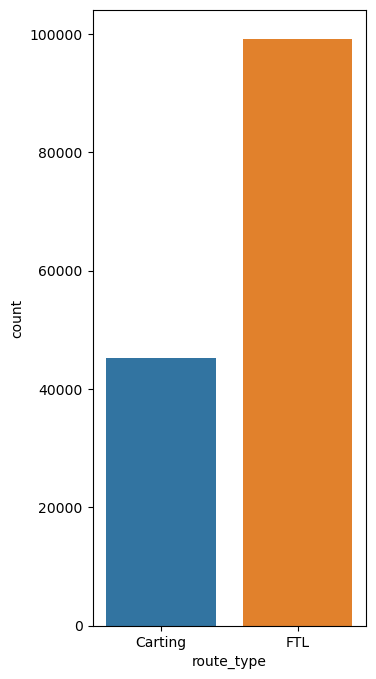

In [19]:
plt.figure(figsize = (12,8))
cat_cols = ['route_type']
for i in range (len(cat_cols)):
  plt.subplot(1, 3, i+1)
  sns.countplot(data=df, x=cat_cols[i])

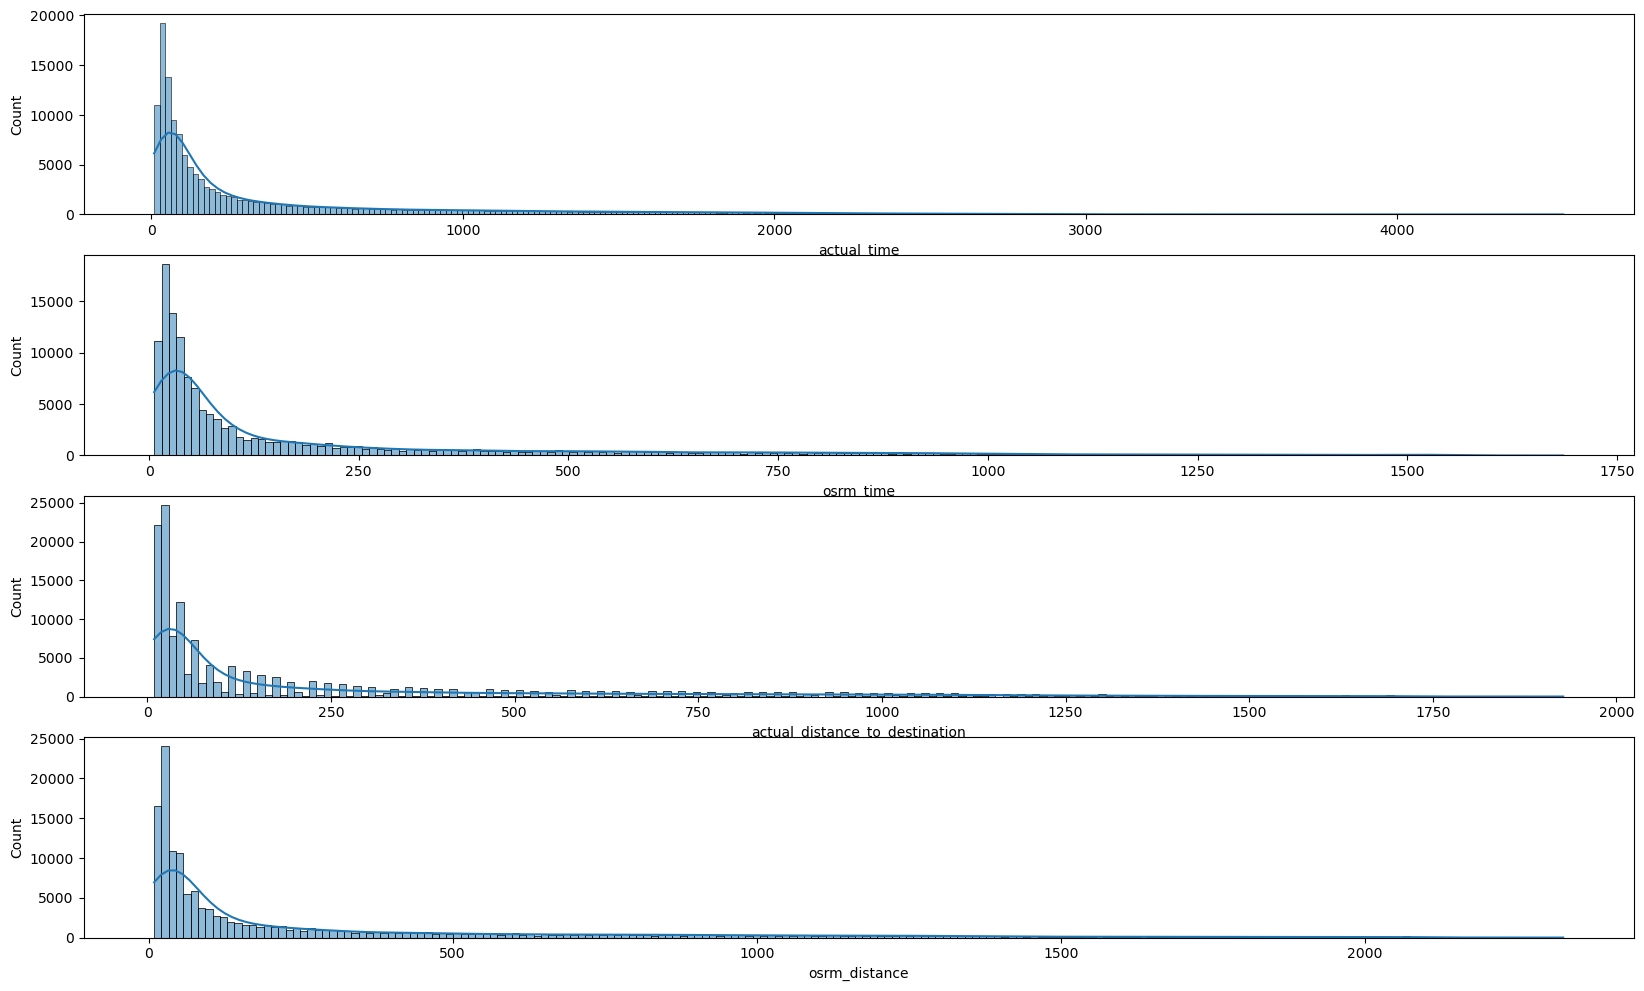

In [20]:
plt.figure(figsize = (20,12))
n_cols = ['actual_time','osrm_time','actual_distance_to_destination','osrm_distance']
for i in range (len(n_cols)):
  plt.subplot(len(n_cols),1, i+1)
  sns.histplot(data = df, x = n_cols[i], kde = True)

Variables show above have extreme right skewed distribution

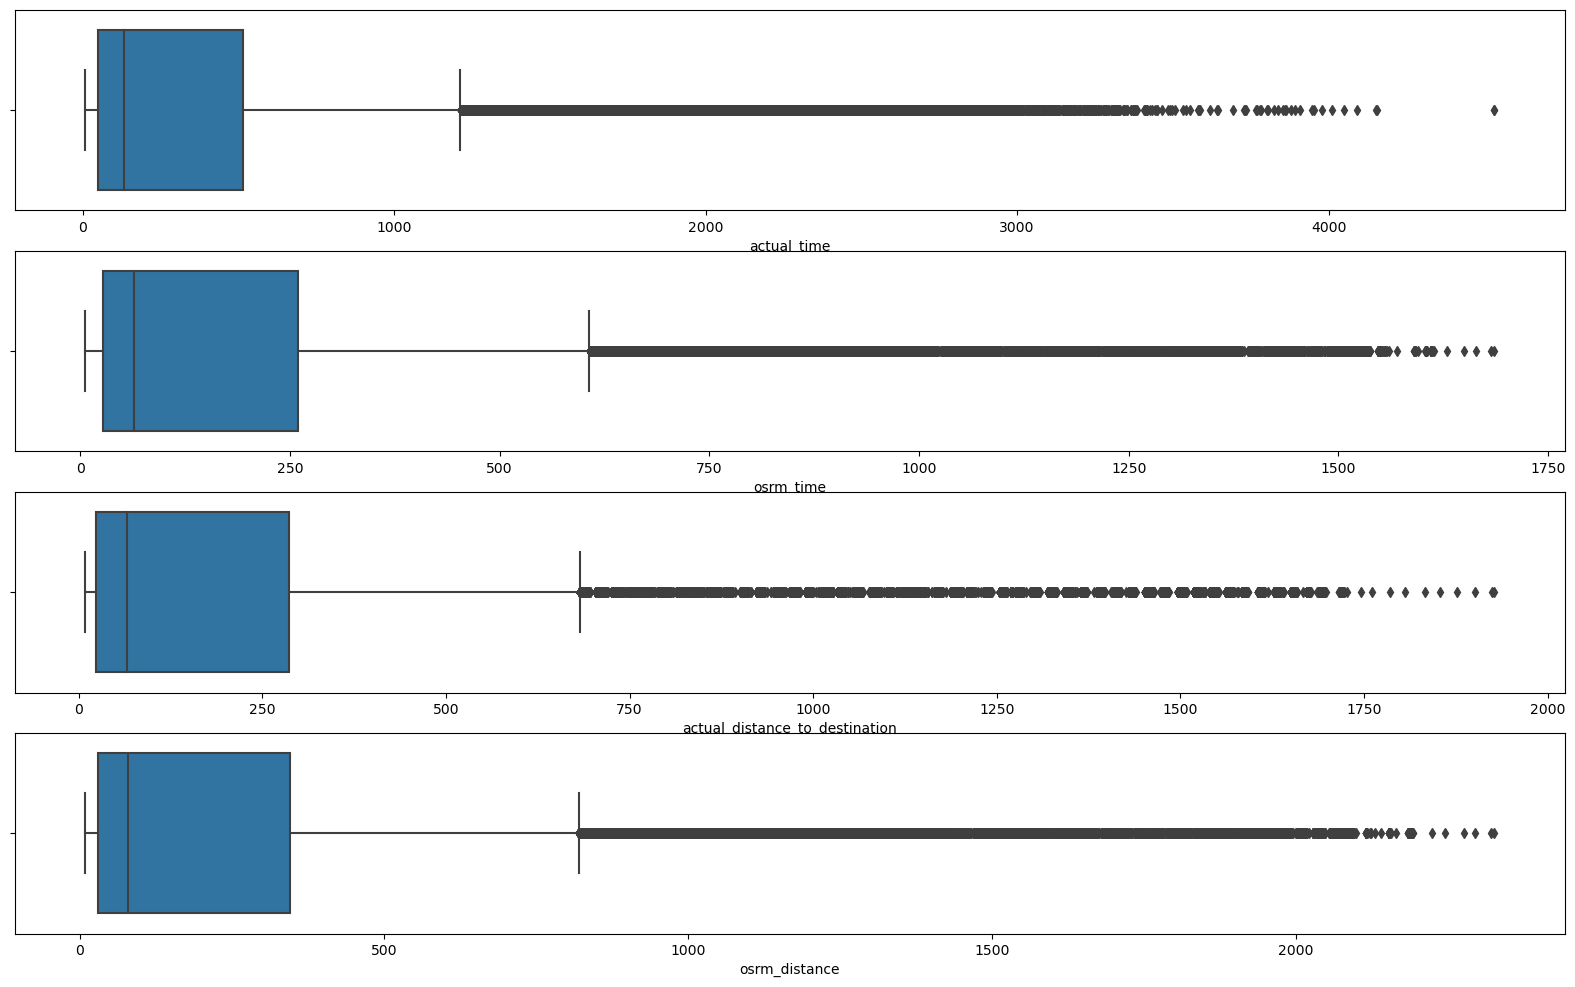

In [21]:
plt.figure(figsize = (20,12))
n_cols = ['actual_time','osrm_time','actual_distance_to_destination','osrm_distance']
for i in range (len(n_cols)):
  plt.subplot(len(n_cols),1, i+1)
  sns.boxplot(data = df, x = n_cols[i])

In [22]:
df['segment_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']
segment_cols = ['segment_actual_time','segment_osrm_distance','segment_osrm_time']
for col in segment_cols:
  df[col+'_sum'] = df.groupby('segment_key')[col].cumsum()
df[[col + '_sum' for col in segment_cols]].head()

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0


In [23]:
segment_data = {
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',

    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum'
}

In [24]:
segment = df.groupby('segment_key').agg(segment_data).reset_index()
segment = segment.sort_values(by=['segment_key','od_end_time'],ascending=True).reset_index()

# Creating Feature

In [25]:
segment['od_time_diff_hour'] = (segment['od_end_time'] - segment['od_start_time']).dt.total_seconds()/60

In [26]:
segment

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,...,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,3464.0,4540.1261,6434.0,6343.4400,5032.0,1260.604421
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,...,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,4323.0,6037.6386,9082.0,7878.6704,5638.0,999.505379
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,...,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,55.0,60.3157,95.0,60.3159,55.0,58.832388
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,...,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,155.0,209.1151,301.0,208.1935,144.0,122.779486
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,...,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,1427.0,1975.7409,2584.0,2062.8567,1476.0,834.638929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,26217,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,...,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,106.0,106.7084,116.0,105.9520,107.0,62.115193
26218,26218,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,...,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,108.0,111.8555,172.0,164.2574,144.0,91.087797
26219,26219,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,...,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,22.0,25.5371,50.0,25.5370,22.0,44.174403
26220,26220,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,...,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,59.0,76.5169,278.0,76.5169,59.0,287.474007


Here we are actually calculating the time taken between od_start_time and od_end_time.
Also, leveraging it a feature for further analysis.

In [29]:
trip_data = {
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'start_scan_to_end_scan' : 'sum',
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum'
}

In [30]:
trip = segment.groupby('trip_uuid').agg(trip_data).reset_index(drop=True)
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,824.732854,1562.0,7787.0,10577.7647,15516.0,14222.1104,10670.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,73.186911,143.0,210.0,269.4308,396.0,268.5094,199.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,1927.404273,3347.0,65768.0,89447.2488,110876.0,90479.7151,70971.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,17.175274,59.0,24.0,31.6475,82.0,31.8441,25.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,127.448500,341.0,207.0,266.2914,555.0,266.2915,204.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,57.762332,83.0,148.0,162.9473,184.0,154.3394,148.0
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,15.513784,21.0,19.0,26.5333,33.0,26.5334,18.0
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,38.684839,282.0,134.0,162.8499,548.0,249.4333,202.0
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,134.723836,264.0,446.0,449.5383,592.0,520.5464,497.0


# Treating Outliers

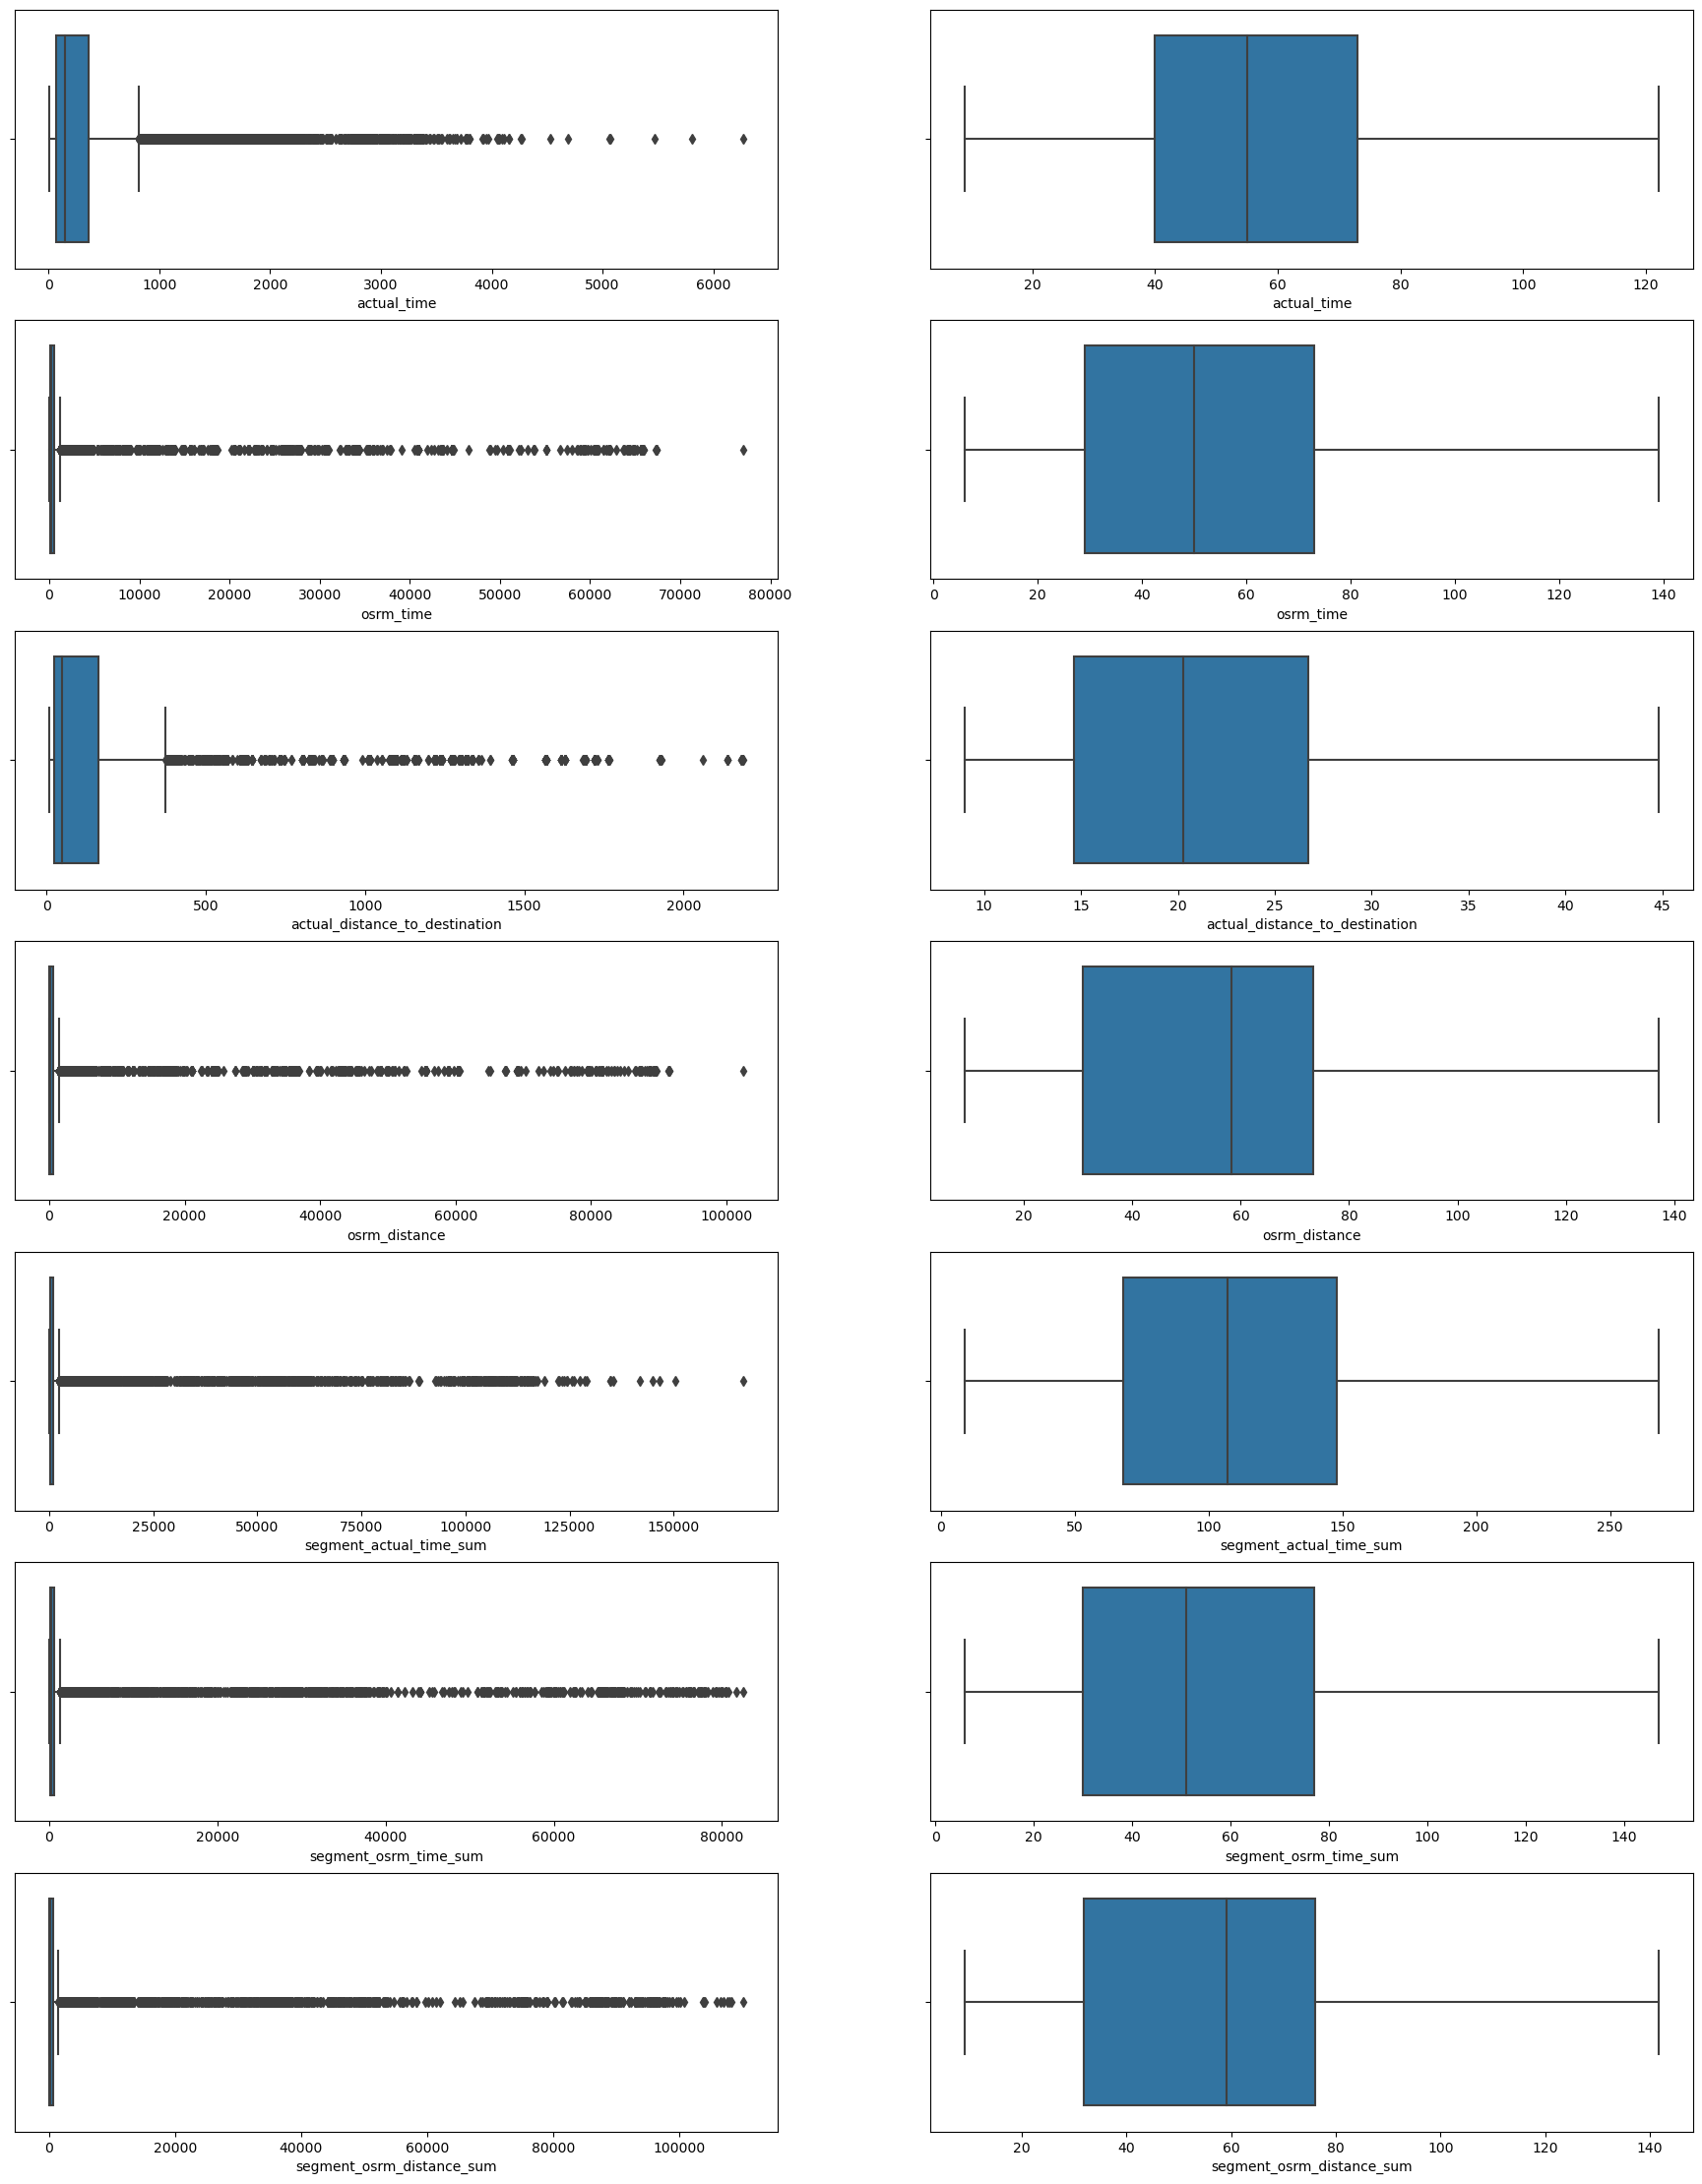

In [31]:
trip_new = trip.copy()

def rabbit(col):
  q1=col.quantile(0.25)
  q3=col.quantile(0.75)
  IQR=q3-q1
  outliers = trip[((col<(q1-1.5*IQR)) | (col>(q3+1.5*IQR)))]
  return outliers

cols = ['actual_time', 'osrm_time','actual_distance_to_destination','osrm_distance','segment_actual_time_sum','segment_osrm_time_sum','segment_osrm_distance_sum']

n=1
while n!=0:
  n=0
  for x in cols:
    outliers = rabbit(trip[x]).index
    trip.drop(outliers,inplace=True)
    n+=len(outliers)
    

fig, axis = plt.subplots(nrows=len(cols), ncols=2, figsize=(22, len(cols)*4))
for i in range (len(cols)):
  for j in ([0,1]):
    if j==0:
      sns.boxplot(data = trip_new, x = cols[i], ax = axis[i, j])
    else:
      sns.boxplot(data = trip, x = cols[i], ax = axis[i, j])

T-Test for checking the mean of actual time Vs osrm_time

In [66]:
from scipy.stats import ttest_ind

null_hypothesis = 'mean of actual_time is not higher than mean of osrm_time'    
alternate_hypothesis = 'mean of actual_time is higher than mean of osrm_time'  

sample1 = trip['actual_time']
sample2 = trip['osrm_time']
t_stat, p_value = ttest_ind(sample1, sample2, equal_var=False, alternative='greater')
print('T_stat :' ,t_stat, 'P value :' ,p_value)

if(p_value < 0.05):
  print('Since, p-value < 0.05, we reject null hypothesis')
  print(alternate_hypothesis)
else:
  print('Since p-value > 0.05, we fail to reject null hypothesis')
  print(null_hypothesis)

T_stat : 6.307544212335 P value : 1.477951388534912e-10
Since, p-value < 0.05, we reject null hypothesis
mean of actual_time is higher than mean of osrm_time


T-Test for checking the mean of osrm_distance is similer to as that of segment_osrm_distance_sum

In [65]:
null_hypothesis = 'mean of osrm_distance is similer as mean of segment_osrm_distance_sum'    
alternate_hypothesis = 'mean of osrm_distance is higher than mean of segment_osrm_distance_sum'  

sample1 = trip['osrm_distance']
sample2 = trip['segment_osrm_distance_sum']
t_stat, p_value = ttest_ind(sample1, sample2, equal_var=False, alternative='greater')
print('T_stat :' ,t_stat, 'P value :' ,p_value)

if(p_value < 0.05):
  print('Since, p-value < 0.05, we reject null hypothesis')
  print(alternate_hypothesis)
else:
  print('Since p-value > 0.05, we fail to reject null hypothesis')
  print(null_hypothesis)

T_stat : -3.4156110488999936 P value : 0.9996805751383507
Since p-value > 0.05, we fail to reject null hypothesis
mean of osrm_distance is similer as mean of segment_osrm_distance_sum


In [43]:
from scipy import stats

num_cols = ['actual_time','osrm_time','segment_actual_time_sum','segment_osrm_time_sum','actual_distance_to_destination','osrm_distance','segment_osrm_distance_sum']

for i in (num_cols):
  stat, p_value = stats.shapiro(sample1)
  if(p_value < 0.05):
    print(i, ": sample is not normally distributed, do non parametric test")
  else:
    print(i, ": sample is normally distributed, can do parametric test")

actual_time : sample is not normally distributed, do non parametric test
osrm_time : sample is not normally distributed, do non parametric test
segment_actual_time_sum : sample is not normally distributed, do non parametric test
segment_osrm_time_sum : sample is not normally distributed, do non parametric test
actual_distance_to_destination : sample is not normally distributed, do non parametric test
osrm_distance : sample is not normally distributed, do non parametric test
segment_osrm_distance_sum : sample is not normally distributed, do non parametric test


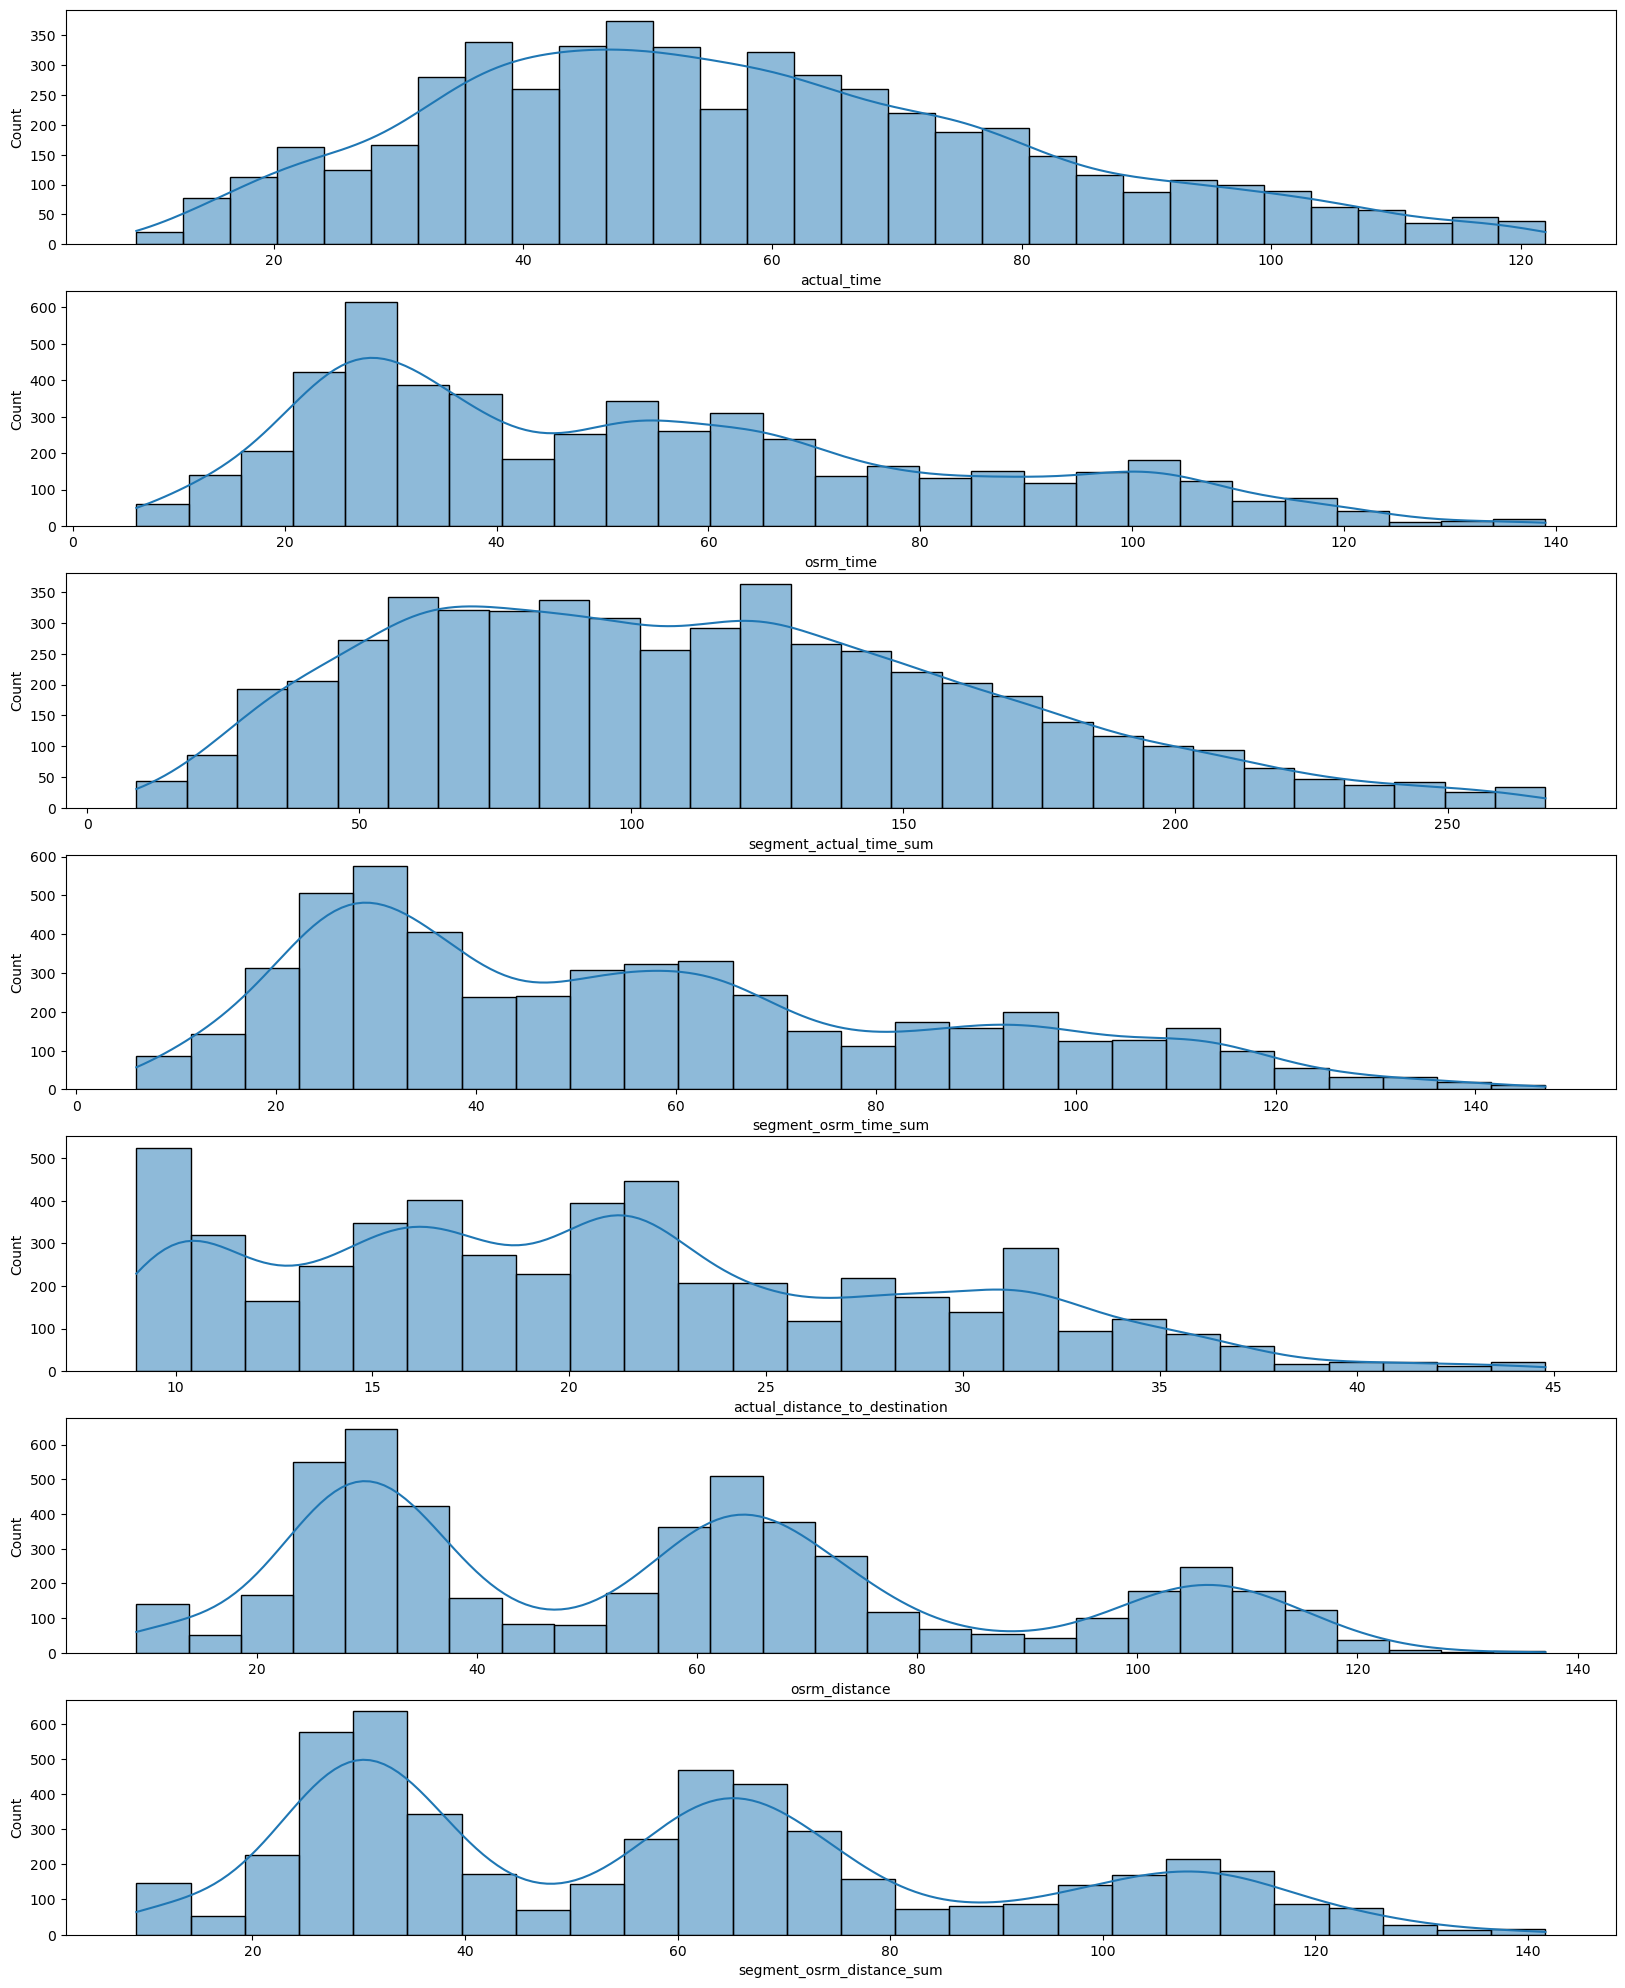

In [45]:
plt.figure(figsize = (20,25))
num_cols = ['actual_time','osrm_time','segment_actual_time_sum','segment_osrm_time_sum','actual_distance_to_destination','osrm_distance','segment_osrm_distance_sum']
for i in range (len(num_cols)):
  plt.subplot(len(num_cols),1, i+1)
  sns.histplot(data = trip, x = num_cols[i], kde = True)

In [61]:
from scipy.stats import mannwhitneyu

null_hypothesis = 'mean of both samples are similer'
alternate_hypothesis = 'means of both samples are different'

sample1 = trip['actual_time']
sample2 = trip['osrm_time']
# perform mann whitney test
stat, p_value = mannwhitneyu(sample1, sample2)
print('Stat :' ,stat, 'P value :' ,p_value)
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Fail to Reject Null Hypothesis (No significant difference between two samples)')

Stat : 14829121.0 P value : 1.2348725672742332e-23
Reject Null Hypothesis (Significant difference between two samples)


# Normalization

In [48]:
df_ao = trip[["actual_time", "osrm_time"]]

In [71]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df_ao_ss = StandardScaler().fit_transform(df_ao)

In [50]:
df_ao_ss = pd.DataFrame(df_ao_ss, columns=["actual_time", "osrm_time"])

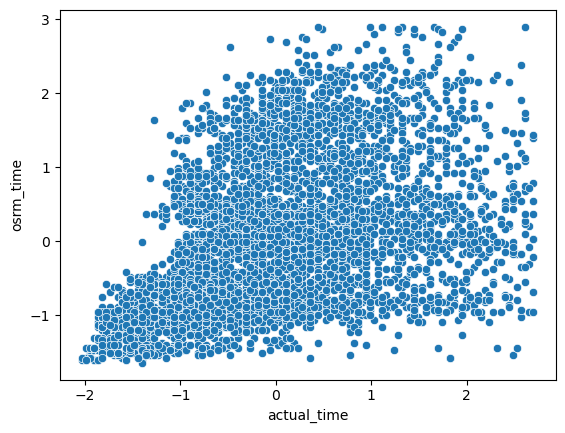

In [51]:
sns.scatterplot(x = df_ao_ss["actual_time"], y = df_ao_ss["osrm_time"])
plt.show()

D:\games\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\games\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


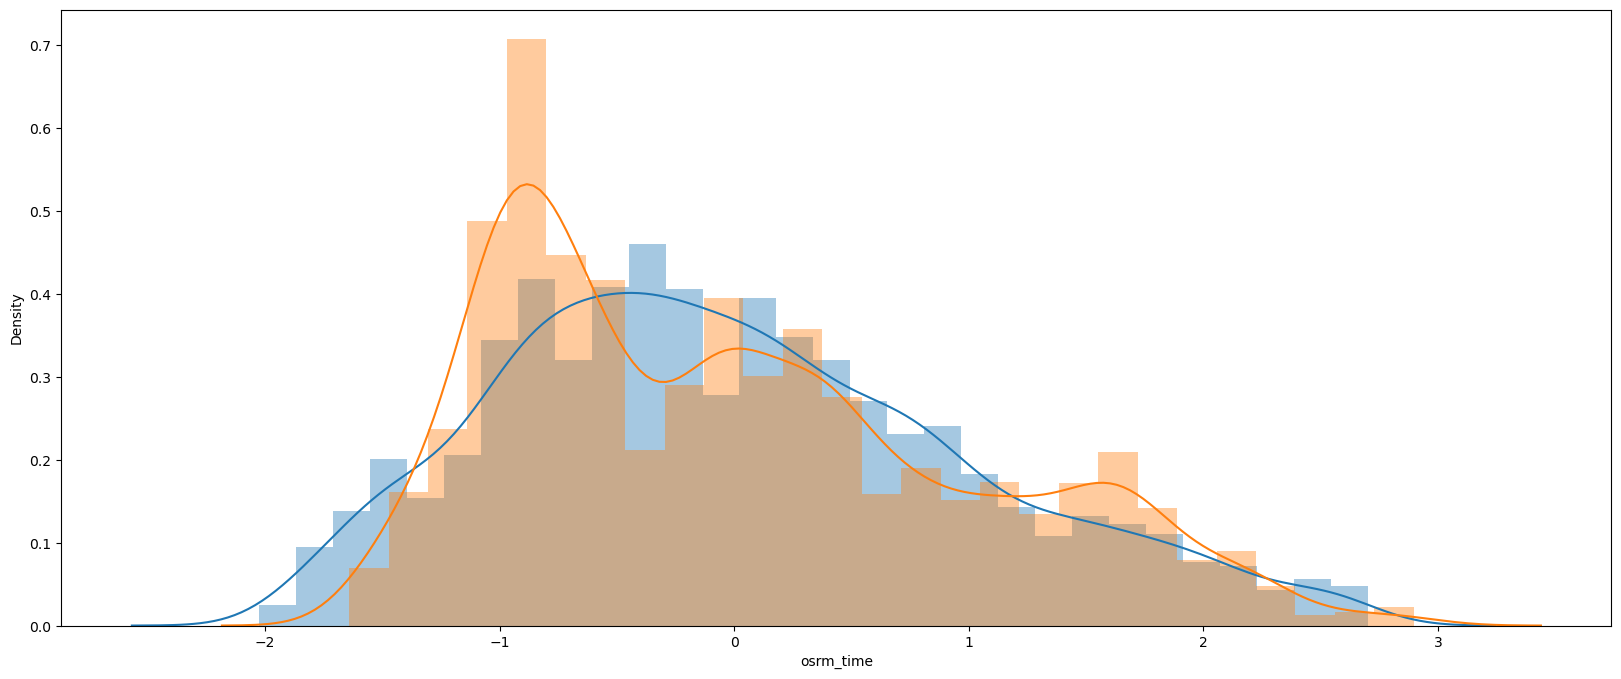

In [60]:
plt.figure(figsize = (20,8))
sns.distplot(df_ao_ss['actual_time'])
sns.distplot(df_ao_ss['osrm_time'])
plt.show()

In [64]:
null_hypothesis = 'mean of actual_time is similer to osrm_time'    
alternate_hypothesis = 'mean of actual_time is different than osrm_time'  

sample1 = df_ao_ss['actual_time']
sample2 = df_ao_ss['osrm_time']
t_stat, p_value = ttest_ind(sample1, sample2)
print('T_stat :' ,t_stat, 'P value :' ,p_value)

if(p_value < 0.05):
  print('Since, p-value < 0.05, we reject null hypothesis')
  print(alternate_hypothesis)
else:
  print('Since p-value > 0.05, we fail to reject null hypothesis')
  print(null_hypothesis)

T_stat : -4.301138070642346e-15 P value : 0.9999999999999966
Since p-value > 0.05, we fail to reject null hypothesis
mean of actual_time is similer to osrm_time


In [67]:
df_ao_ss.mean()

actual_time   -8.176061e-17
osrm_time     -6.540849e-18
dtype: float64

In [75]:
df_ao_mm = MinMaxScaler().fit_transform(df_ao)

In [76]:
df_ao_mm = pd.DataFrame(df_ao_mm, columns=["actual_time", "osrm_time"])

In [77]:
df_ao_mm.mean()

actual_time    0.428626
osrm_time      0.361746
dtype: float64

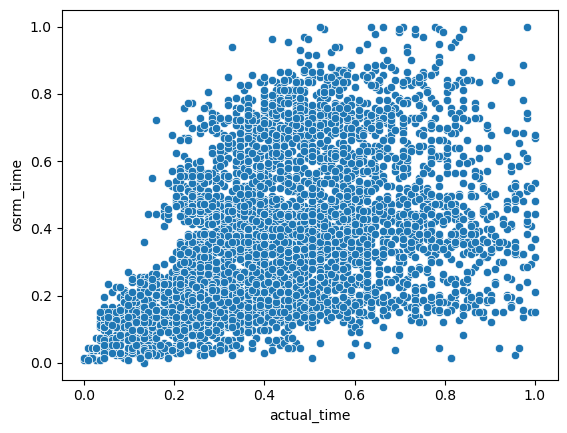

In [78]:
sns.scatterplot(x = df_ao_mm["actual_time"], y = df_ao_mm["osrm_time"])
plt.show()

D:\games\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\games\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


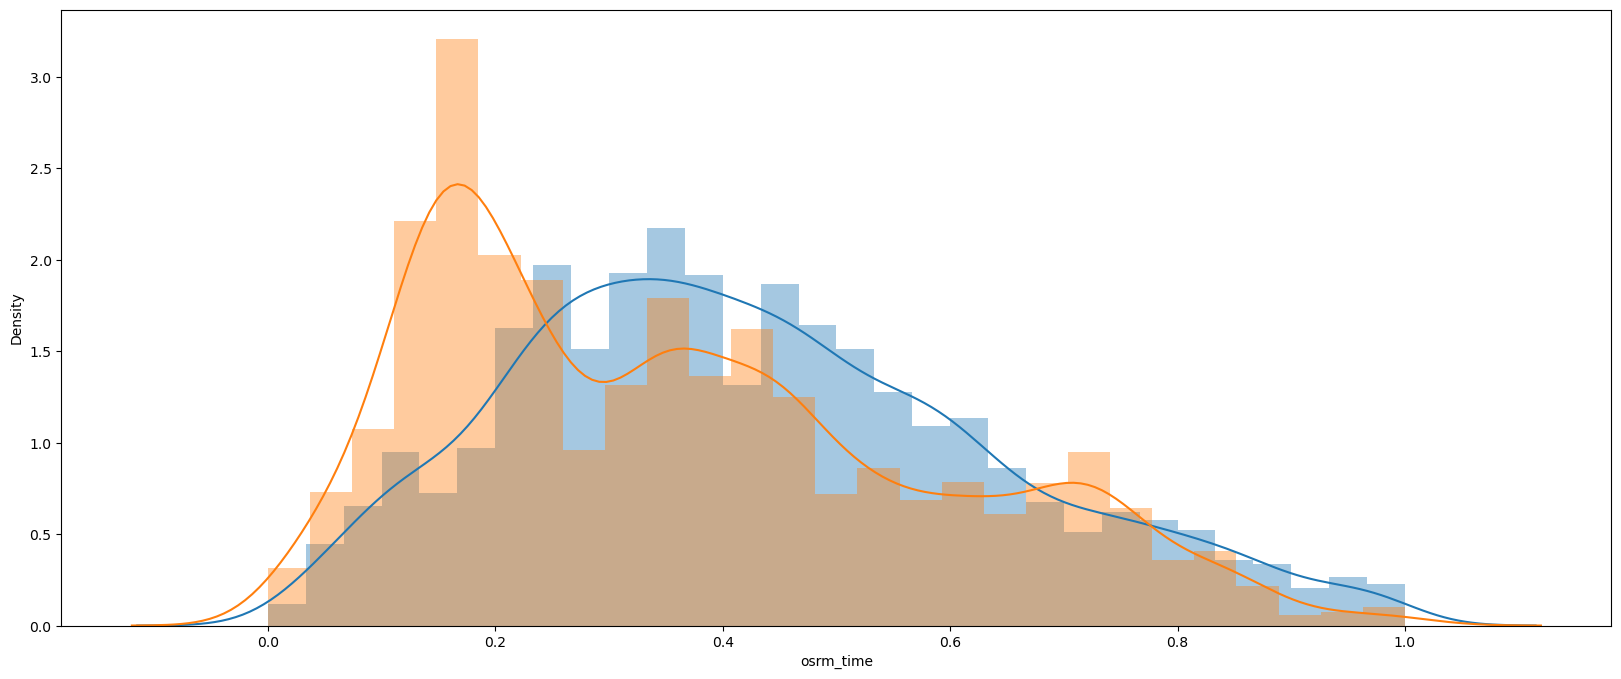

In [79]:
plt.figure(figsize = (20,8))

sns.distplot(df_ao_mm['actual_time'])
sns.distplot(df_ao_mm['osrm_time'])
plt.show()

In [83]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
trip[col] = label_encoder.fit_transform(trip['route_type'])
trip[col].value_counts()

0    4907
1     253
Name: segment_osrm_time, dtype: int64

In [81]:
trip['data'].value_counts()

training    3599
test        1561
Name: data, dtype: int64

In [82]:
label_encoder = LabelEncoder()
trip[col] = label_encoder.fit_transform(trip['data'])
trip[col].value_counts()

1    3599
0    1561
Name: segment_osrm_time, dtype: int64

In [92]:
ds = trip[['destination_name']].copy()

new = trip['source_name'].str.split(" ", n = 1, expand = True)
ds['source_city']= new[0]
ds['source_state']= new[1].str[1:-1]

new = trip['destination_name'].str.split(" ", n = 1, expand = True)
ds['destination_city']= new[0]
ds['destination_state']= new[1].str[1:-1]

ds['Corridor'] = ds['source_city']+" To "+ds['destination_city']

ds.head()

,destination_name,source_city,source_state,destination_city,destination_state,Corridor
3,Mumbai_MiraRd_IP (Maharashtra),Mumbai,ub (Maharashtra,Mumbai_MiraRd_IP,Maharashtra,Mumbai To Mumbai_MiraRd_IP
5,Chennai_Poonamallee (Tamil Nadu),Chennai_Poonamallee,Tamil Nadu,Chennai_Poonamallee,Tamil Nadu,Chennai_Poonamallee To Chennai_Poonamallee
6,Chennai_Vandalur_Dc (Tamil Nadu),Chennai_Chrompet_DPC,Tamil Nadu,Chennai_Vandalur_Dc,Tamil Nadu,Chennai_Chrompet_DPC To Chennai_Vandalur_Dc
7,HBR Layout PC (Karnataka),HBR,ayout PC (Karnataka,HBR,ayout PC (Karnataka,HBR To HBR
9,Delhi_Bhogal (Delhi),Delhi_Lajpat_IP,Delhi,Delhi_Bhogal,Delhi,Delhi_Lajpat_IP To Delhi_Bhogal


In [93]:
ds['Corridor'].value_counts()

Bhiwandi_Mankoli_HB To Mumbai                    100
Bangalore_Nelmngla_H To Bengaluru_KGAirprt_HB     87
Mumbai_Chndivli_PC To Bhiwandi_Mankoli_HB         77
Pune_Tathawde_H To PNQ                            75
Mumbai To Mumbai_MiraRd_IP                        72
                                                ... 
Ramagundam_Pdmavati_D To Chinnur_AsnsdhRD_D        1
Delhi_Rohini_DPC To Delhi_Barwala                  1
Wardha_RamaNgr_D To Deoli_Central_DPP_2            1
Nadiad_DC To Nadiad_DC                             1
Janakpuri To Delhi_Nangli_IP                       1
Name: Corridor, Length: 658, dtype: int64

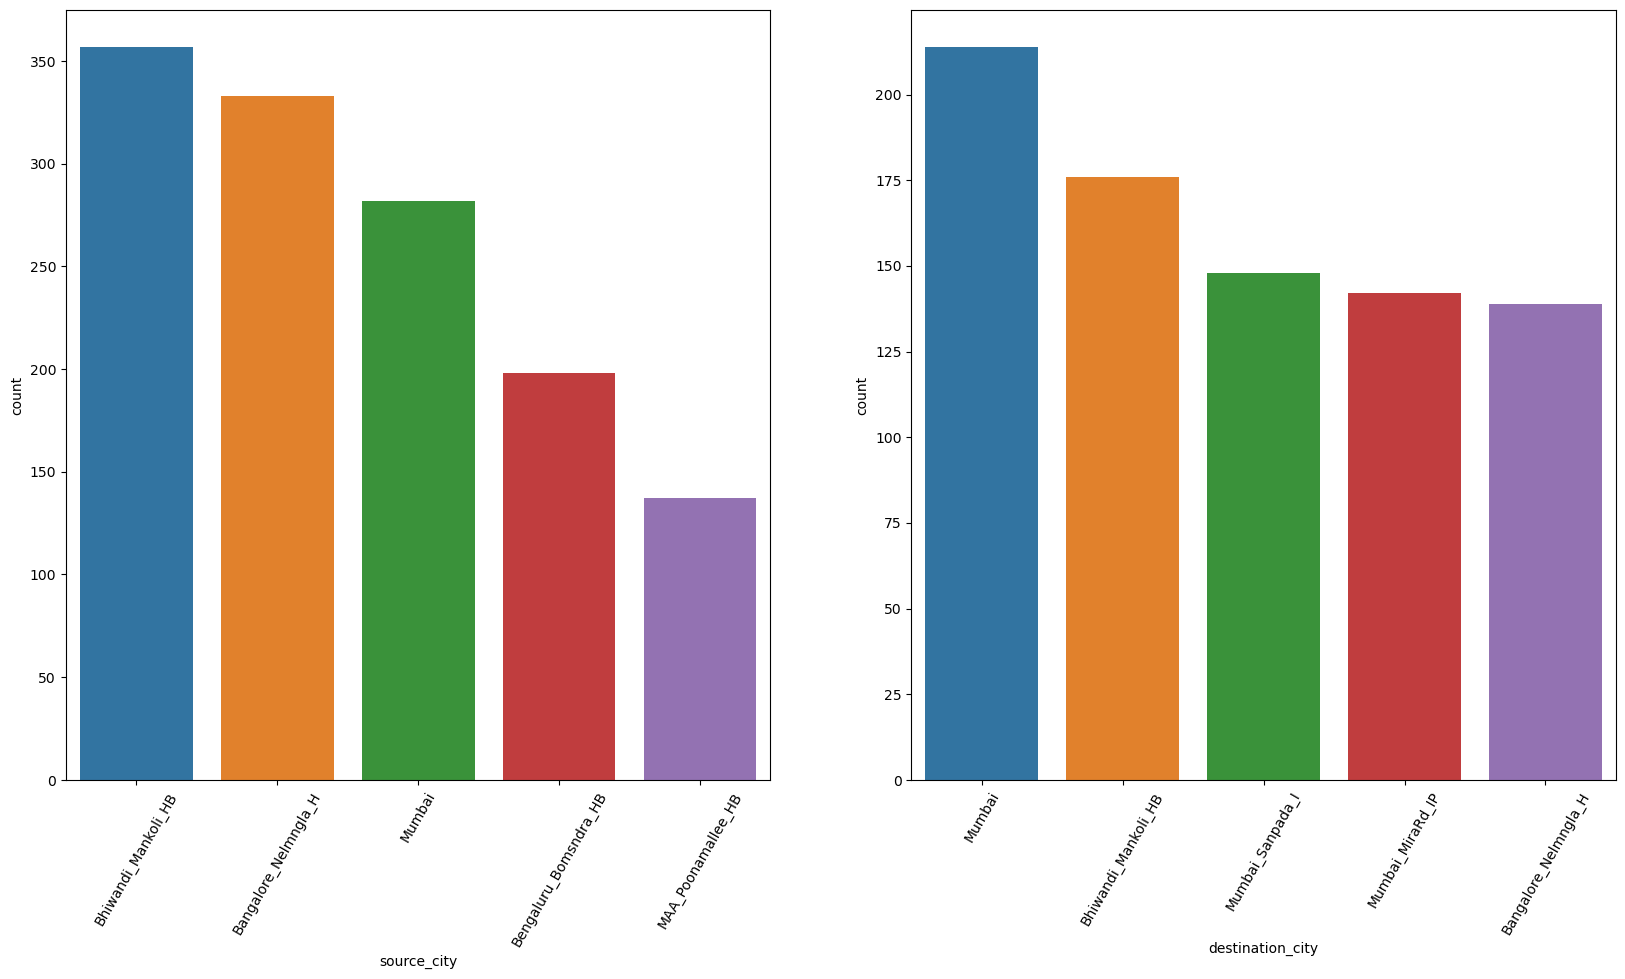

In [97]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.countplot(data = ds, x = 'source_city', order = ds['source_city'].value_counts().nlargest(5).index)
plt.xticks(rotation = 60)

plt.subplot(1,2,2)
sns.countplot(data = ds, x = 'destination_city', order = ds['destination_city'].value_counts().nlargest(5).index)
plt.xticks(rotation = 60)
plt.show()

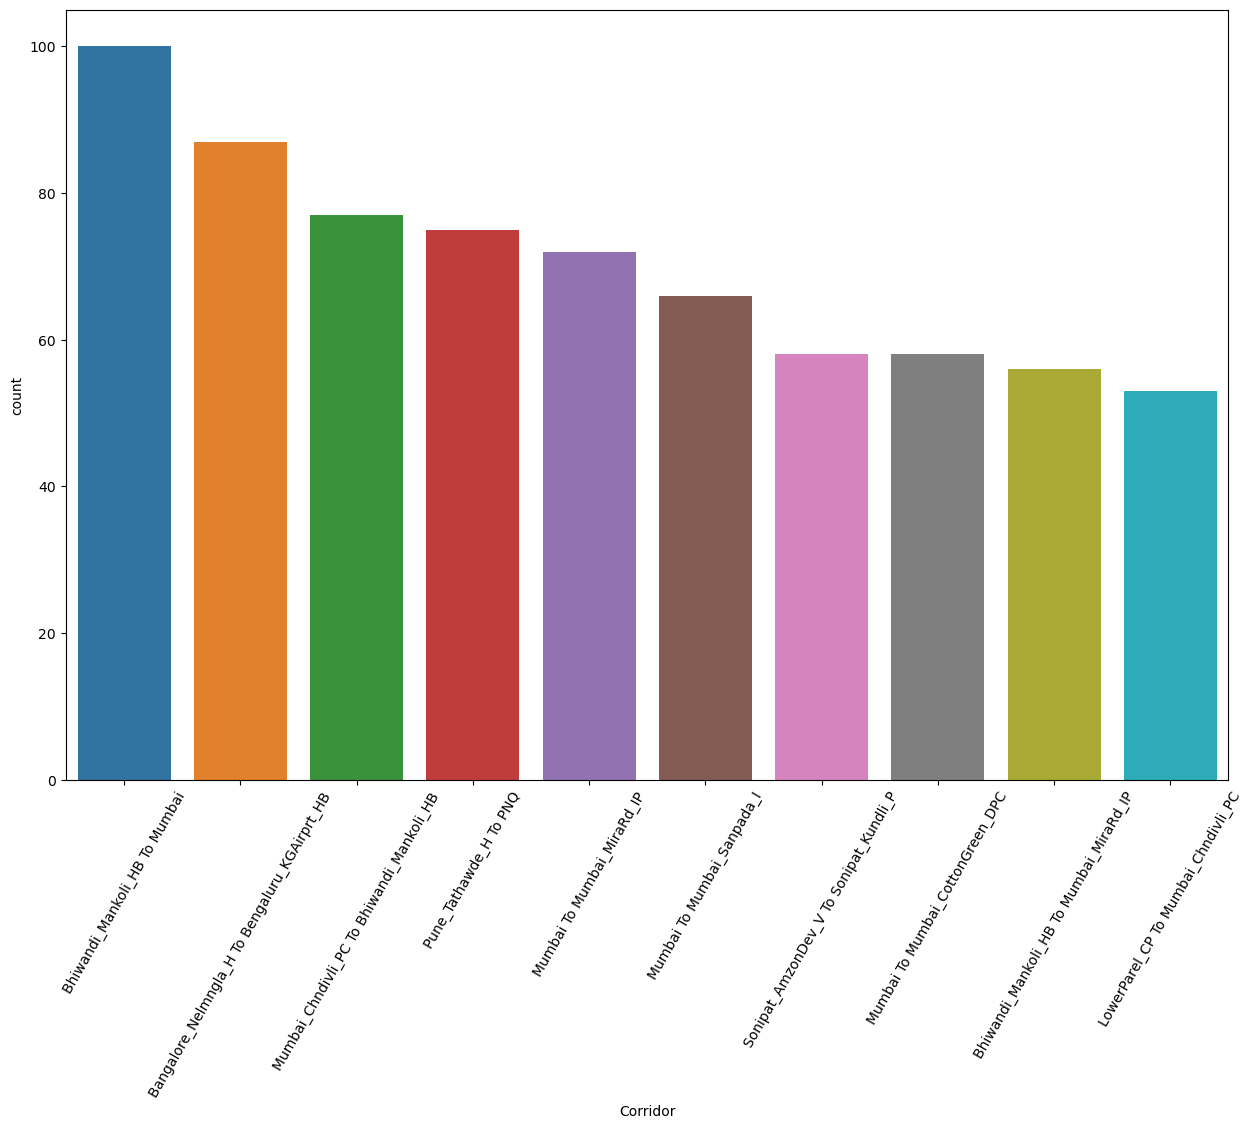

In [98]:
plt.figure(figsize=(15,10))
sns.countplot(data = ds, x = 'Corridor', order = ds['Corridor'].value_counts().nlargest(10).index)
plt.xticks(rotation = 60)
plt.show()

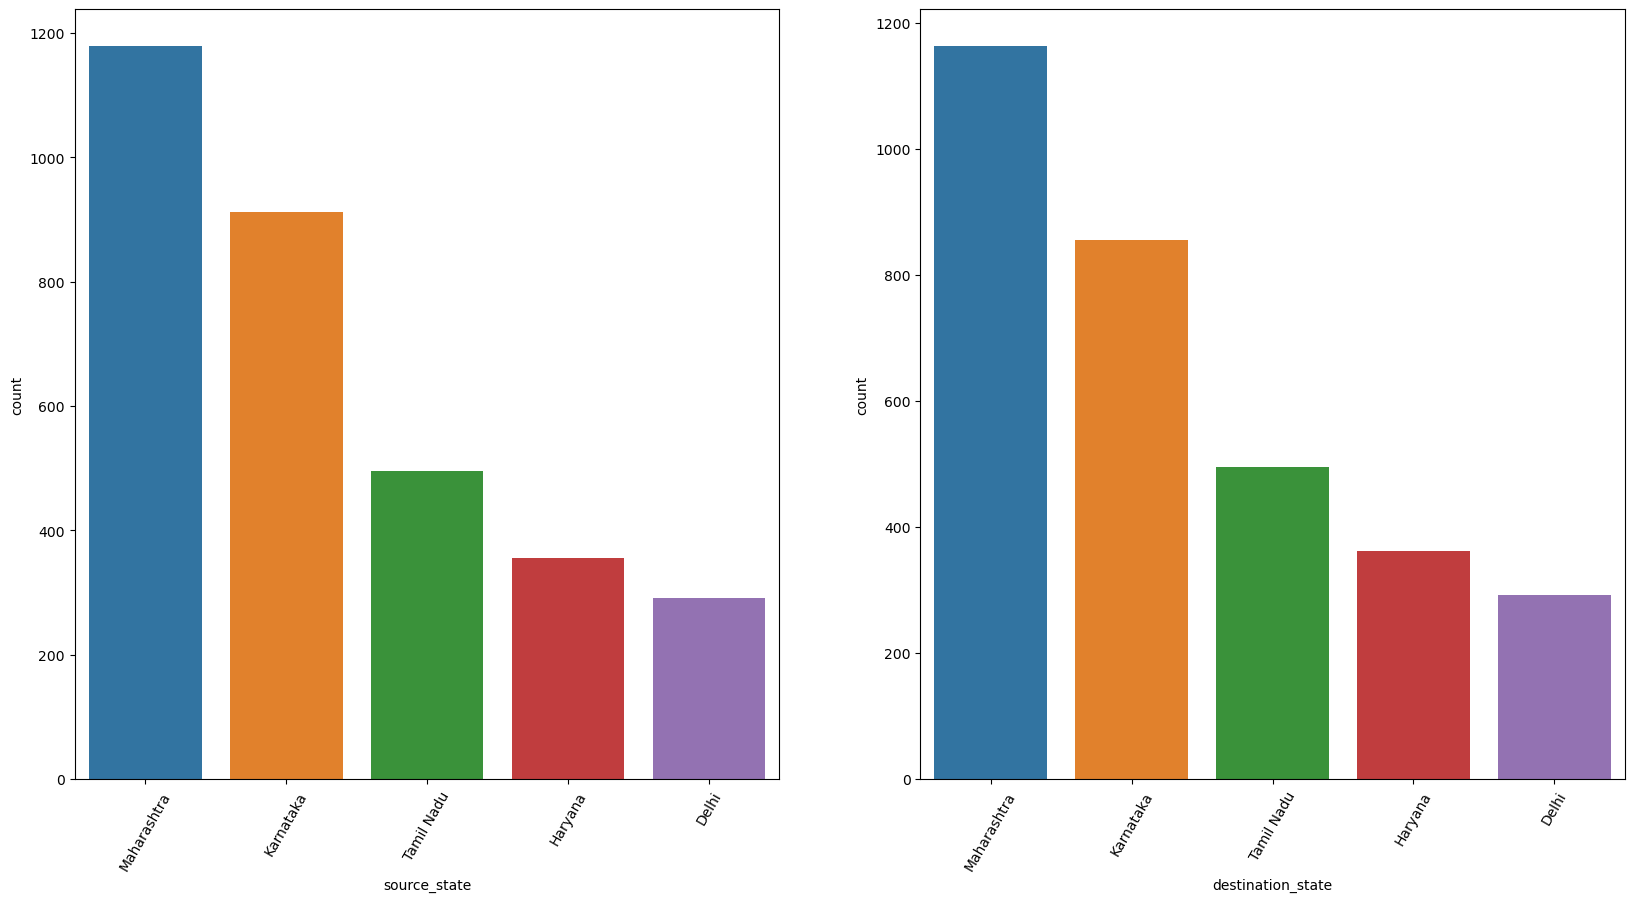

In [100]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.countplot(data = ds, x ='source_state', order = ds['source_state'].value_counts().nlargest(5).index)
plt.xticks(rotation = 60)

plt.subplot(1,2,2)
sns.countplot(data = ds, x ='destination_state', order = ds['destination_state'].value_counts().nlargest(5).index)
plt.xticks(rotation = 60)
plt.show()

In [101]:
ds.describe()

,destination_name,source_city,source_state,destination_city,destination_state,Corridor
count,5160,5160,5160,5160,5160,5160
unique,415,391,42,411,44,658
top,Mumbai Hub (Maharashtra),Bhiwandi_Mankoli_HB,Maharashtra,Mumbai,Maharashtra,Bhiwandi_Mankoli_HB To Mumbai
freq,212,357,1179,214,1164,100


In [102]:
dn = pd.concat([trip,ds],axis=1)

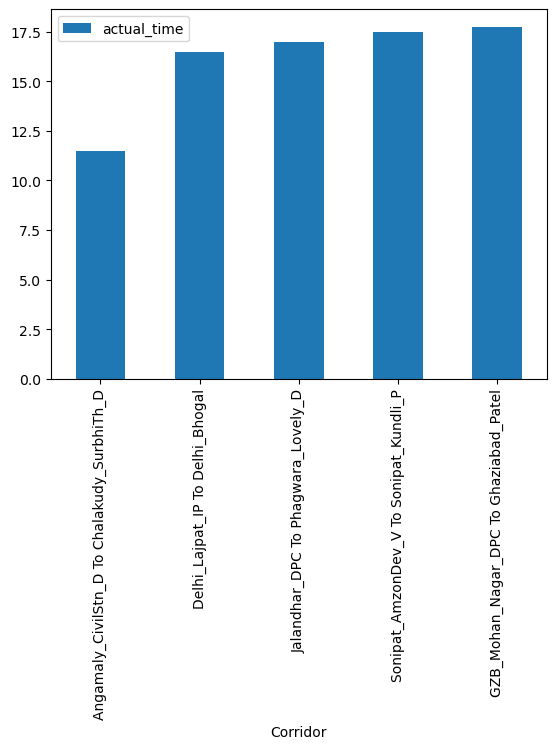

In [103]:
dn.groupby('Corridor').agg({'actual_time':'mean'}).nsmallest(5,columns='actual_time').plot(kind='bar')
plt.show()

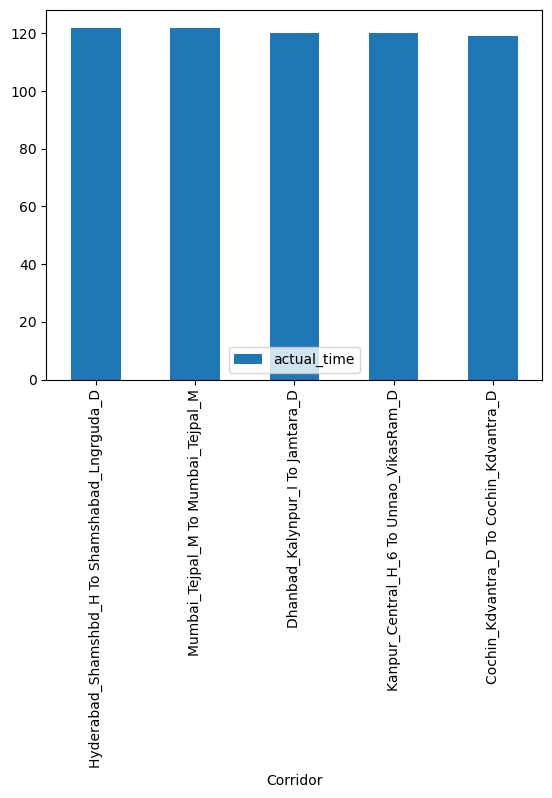

In [104]:
dn.groupby('Corridor').agg({'actual_time':'mean'}).nlargest(5,columns='actual_time').plot(kind='bar')
plt.show()

In [105]:
dn.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,segment_osrm_time
count,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000
mean,155.022481,20.817280,57.434690,54.112209,57.274155,111.931202,59.306743,55.974806,0.049031
std,121.042528,8.006889,23.920582,29.317440,29.436978,54.481461,30.996312,31.131111,0.215954
min,23.000000,9.002461,9.000000,6.000000,9.072900,9.000000,9.072900,6.000000,0.000000
25%,89.000000,14.641301,40.000000,29.000000,30.853800,68.000000,31.738300,30.000000,0.000000
50%,127.000000,20.266599,55.000000,50.000000,58.327150,107.000000,59.146250,51.000000,0.000000
75%,182.000000,26.713161,73.000000,73.000000,73.351800,148.000000,76.117275,77.000000,0.000000
max,2701.000000,44.794445,122.000000,139.000000,137.075200,268.000000,141.654700,147.000000,1.000000


In [106]:
trip_cr = df[['trip_creation_time']].copy()
trip_cr['trip_creation_time'] = pd.to_datetime(trip_cr['trip_creation_time'])
trip_cr['year'] = trip_cr['trip_creation_time'].dt.year
trip_cr['month'] = trip_cr['trip_creation_time'].dt.month
trip_cr['day'] = trip_cr['trip_creation_time'].dt.day
trip_cr

,trip_creation_time,year,month,day
0,2018-09-20 02:35:36.476840,2018,9,20
1,2018-09-20 02:35:36.476840,2018,9,20
2,2018-09-20 02:35:36.476840,2018,9,20
3,2018-09-20 02:35:36.476840,2018,9,20
4,2018-09-20 02:35:36.476840,2018,9,20
...,...,...,...,...
144862,2018-09-20 16:24:28.436231,2018,9,20
144863,2018-09-20 16:24:28.436231,2018,9,20
144864,2018-09-20 16:24:28.436231,2018,9,20
144865,2018-09-20 16:24:28.436231,2018,9,20


In [107]:
trip_cr['year'].value_counts()

2018    144316
Name: year, dtype: int64

In [108]:
trip_cr['month'].value_counts()

9     126932
10     17384
Name: month, dtype: int64

# Handelling missing values

In [85]:
from sklearn.impute import SimpleImputer

new_df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181')
new_df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [86]:
new_df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [88]:
new_df['source_name']  = SimpleImputer(strategy="most_frequent").fit_transform(new_df[['source_name']])

In [89]:
new_df['destination_name'] = SimpleImputer(strategy="most_frequent").fit_transform(new_df[['destination_name']])

In [90]:
new_df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

We can clearly see that there are no missing values, post operating